In [257]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [258]:
dir_name='C:/New_partition/Project_Simon_n_Schuster/'
df_m1=pd.read_csv(dir_name+'sample_data.csv')

In [259]:
df_m1.head()

,entity,formattype,fromdate,titlecount,titles,todate,author,amazontotalreviews,minappleprice,amazontotalrevenue,...,lumpedpreorderrevenue,amazonsoldunits,amazonpreordersubscriptionrevenue,preordersubscriptionunits,amazonpreordersalesrevenue,maxappleprice,pagelength,pricewassetbypublisher,barnesandnobledistributor,appledistributor
0,Alone in the dark,print,20170418,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170419,Frith Banbury,306.0,0,0,...,0,6,0,0,0,0,NaN,NaN,NaN,NaN
1,Alone in the dark,print,20170419,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170420,Frith Banbury,306.0,0,702,...,0,7,0,0,0,0,NaN,NaN,NaN,NaN
2,Alone in the dark,print,20170420,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170421,Frith Banbury,306.0,0,4914,...,0,7,0,0,0,0,NaN,NaN,NaN,NaN
3,Alone in the dark,print,20170421,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170422,Frith Banbury,306.0,0,4212,...,0,6,0,0,0,0,NaN,NaN,NaN,NaN
4,Alone in the dark,print,20170422,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170423,Frith Banbury,306.0,0,702,...,0,1,0,0,0,0,NaN,NaN,NaN,NaN


In [260]:
df_m1.shape

(6539, 106)

29 columns are columns are found to be all zeros. These columns mostly contain preorder subscription revenue ane units of different brands. As these columns are not providing sufficient information they can be dropped. 

In [261]:
zero_cols = [ col for col, is_zero in ((df_m1 == 0).sum() == df_m1.shape[0]).items() if is_zero ]
df_m1.drop(zero_cols, axis=1, inplace=True)

In [262]:
df_m1.drop(columns=['titles'],inplace=True)

In [263]:
df_m1.shape

(6539, 76)

In [264]:
#finding umique values 
uniqueValues = df_m1.nunique()

In [265]:
uniqueValues.tail()

maxappleprice                2
pagelength                   6
pricewassetbypublisher       1
barnesandnobledistributor    1
appledistributor             2
dtype: int64

In [266]:
#finding umique values with Nan
uniqueValues = df_m1.nunique(dropna=False)

In [267]:
uniqueValues.tail()

maxappleprice                2
pagelength                   7
pricewassetbypublisher       2
barnesandnobledistributor    2
appledistributor             3
dtype: int64

Since the output of uniqueValues when we consider is nan values is different. For exampel if we consider column 'appledistributor'
we can see without Nconsiderinbg nan uniquevalues is 2 but when we consider Nan values appledistributor is 3. So now find out 
the Nan values in dataframe

In [268]:
#Total number of nan values
df_m1.isnull().sum().sum()


19615

In [269]:
#number of nan values in each column
df_m1.isnull().sum().head()

entity        0
formattype    0
fromdate      0
titlecount    0
todate        0
dtype: int64

As there are so many column let just find the columns that have missing values.

In [270]:
for column in df_m1:
    if df_m1[column].isnull().any():
       print('{0} has {1} null values'.format(column, df_m1[column].isnull().sum()))

amazontotalreviews has 17 null values
amazonaveragerating has 16 null values
amazoncategories has 5 null values
formats has 1 null values
pagelength has 3981 null values
pricewassetbypublisher has 5008 null values
barnesandnobledistributor has 4804 null values
appledistributor has 5783 null values


# Visualising missing data

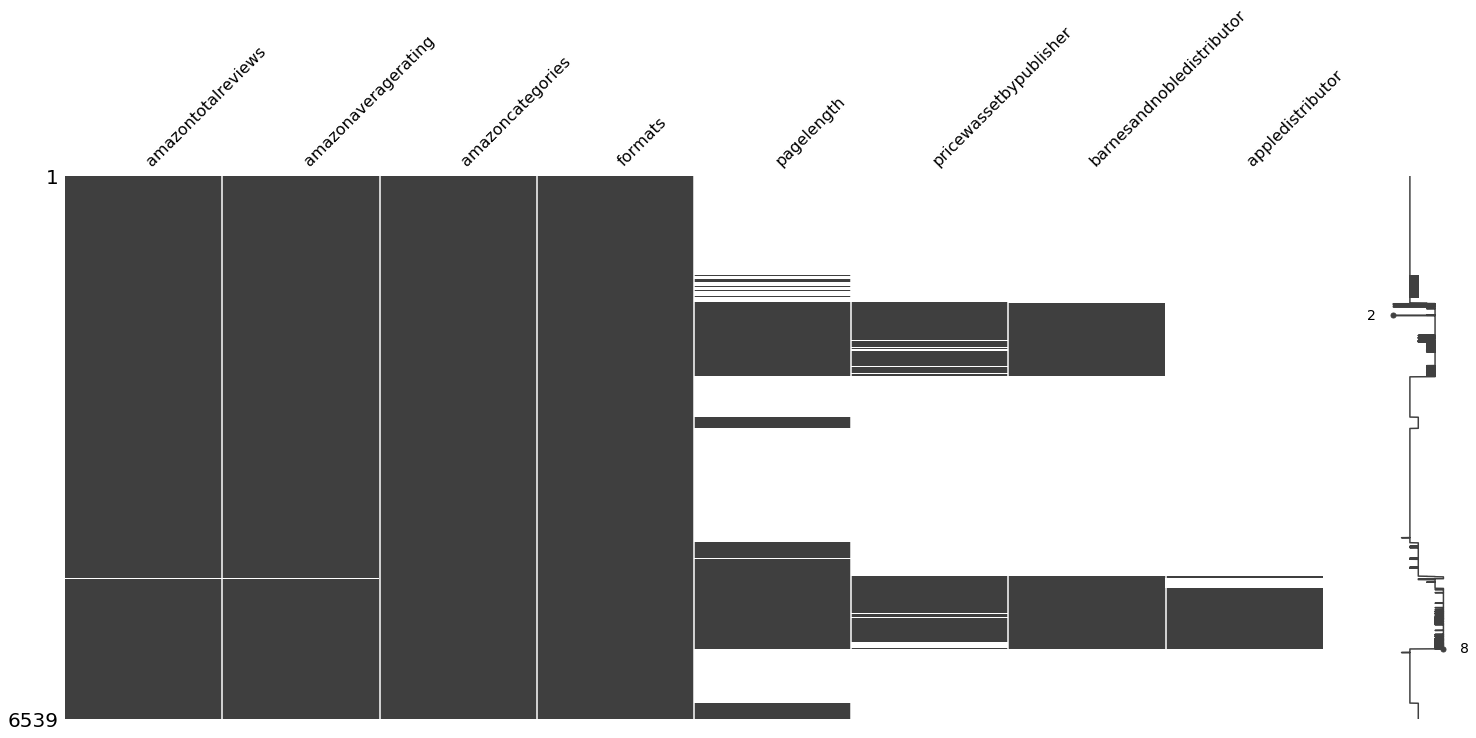

In [271]:
import missingno
missingdata_df = df_m1.columns[df_m1.isnull().any()].tolist()
missingno.matrix(df_m1[missingdata_df])

This graph shows us the patterns of missing values. Amazontotalreviews adn amazonaverage ratings have somehwat simialr pattern.

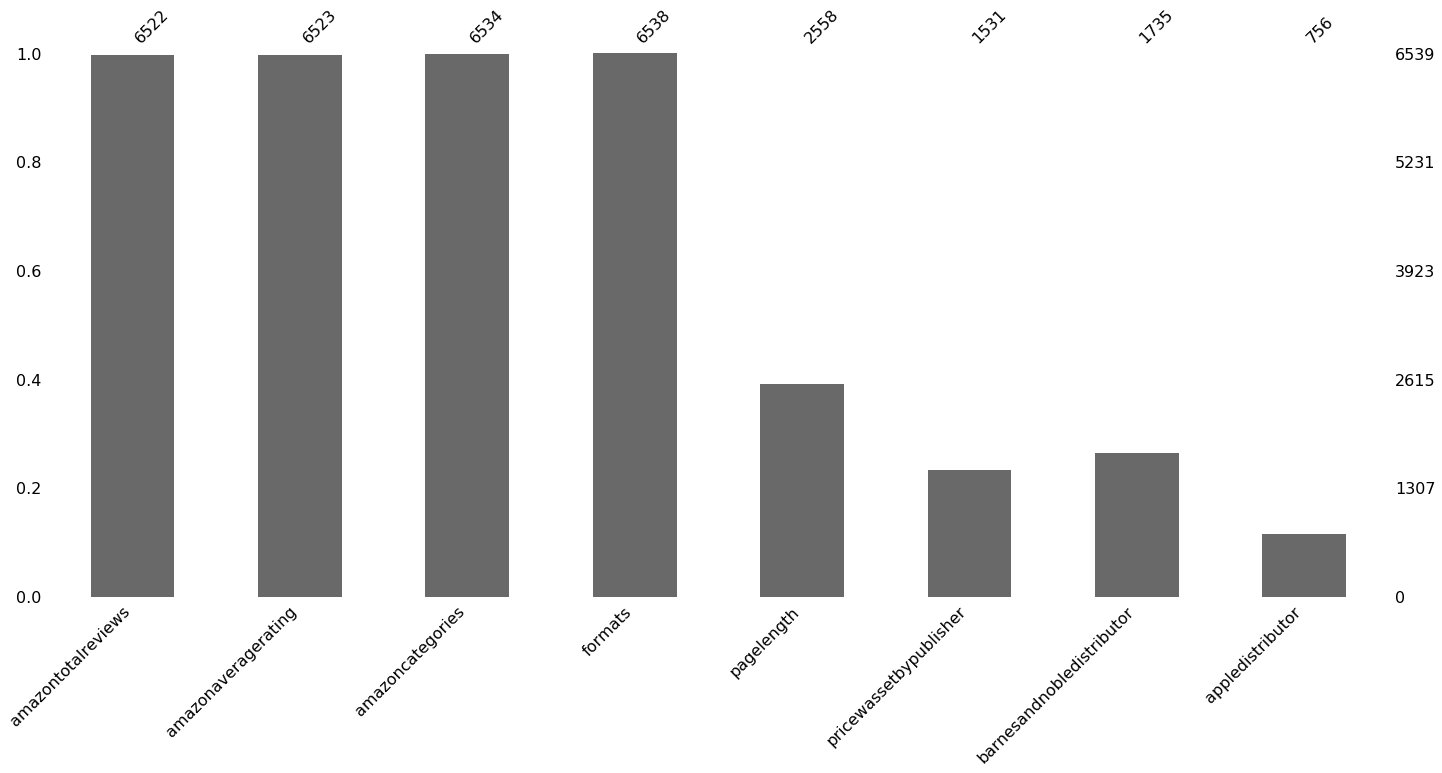

In [272]:
missingno.bar(df_m1[missingdata_df])

This plot shows the number of nan values in the columns. 'Appledistributor' contains the most missing values then 
'pricesetbypublisher' follwoed by 'barnesandnobledistributor' and so on. 

In [23]:
#missingno.heatmap(df_m1[missingdata_df]) 

For missing format I will find the most popular/commom format type and replace it with that. 

In [273]:
df_m1['formats'].value_counts().idxmax()

'Hardcover'

In [274]:
print(list(np.where(df_m1['formats'].isnull())[0]))
val=df_m1['formats'].value_counts().idxmax()

[5735]


In [275]:
#df_m1["formats"].replace("No College", inplace=) 
df_m1["formats"].fillna(df_m1['formats'].value_counts().idxmax(), inplace = True) 

In [280]:
#print(list(np.where(df_m1["formats"].isnull())[0]))

In [277]:
#print(list(np.where(df_m1['amazonaveragerating'].isnull())[0]))

In [278]:
#df_m1["amazonaveragerating"].fillna(df_m1['amazonaveragerating'].value_counts().idxmax(), inplace = True) 

In [281]:
df1=df_m1.iloc[:3040,:]
df2=df_m1.iloc[3040:,:]


I have sliced the dataset because there are 2 differnt entities(books) we are dealing with and in order to fill missing values
I think it is better to deal with them separately. For column=amazonaveragerating I would fill with mean value. Also, for amazontotalreviews I will replace with mean value of entire column. 

In [282]:
for column in df1:
    if df1[column].isnull().any():
       print('{0} has {1} null values'.format(column, df1[column].isnull().sum()))

amazontotalreviews has 5 null values
amazonaveragerating has 5 null values
amazoncategories has 5 null values
pagelength has 1938 null values
pricewassetbypublisher has 2253 null values
barnesandnobledistributor has 2172 null values
appledistributor has 3040 null values


In [283]:
df1["amazonaveragerating"].fillna(df1['amazonaveragerating'].mean(), inplace = True) 
df2["amazonaveragerating"].fillna(df2['amazonaveragerating'].mean(), inplace = True) 

In [290]:
df1["amazontotalreviews"].fillna(df1['amazontotalreviews'].mean(), inplace = True) 
df2["amazontotalreviews"].fillna(df2['amazontotalreviews'].mean(), inplace = True) 

In [291]:
#print(list(np.where(df1['amazontotalreviews'].isnull())[0]))

In [296]:
df1["amazoncategories"].fillna(df1['amazoncategories'].value_counts().idxmax(), inplace = True) 

In [293]:
#print(list(np.where(df1['amazoncategories'].isnull())[0]))

Right now I am leaving other column. The reason is I might not need them. The remaining 4 columns are entirely nan for df1 which corresponds to entity/book 1. If I do I would use a similar technique to replace Nan values. 

In [297]:
#df1.fillna(0,inplace=True)
#df1.isnull().sum()

In [298]:
for column in df_m1:
    if df_m1[column].isnull().any():
       print('{0} has {1} null values'.format(column, df_m1[column].isnull().sum()))

pagelength has 3981 null values
pricewassetbypublisher has 5008 null values
barnesandnobledistributor has 4804 null values
appledistributor has 5783 null values


### Finding Time Series 

If I manually look at the dataframe I made the following observation:
    
1. They are two entities i.e two books.
2. Data is time series
3. Data is repetitive.
4. Some columns even appear to be exactly same. For eg:
foundatamazon and bookscnareported and aaprereported and puttrackreported all seems equal. Simialry minamazonprice is equal to minlistprice


In [299]:
uniqueValues['entity']
df_m1['entity'].value_counts()

The Walking Dead     3499
Alone in the dark    3040
Name: entity, dtype: int64

In [300]:
uniqueValues['author']
df_m1['author'].value_counts()

Matthew Murdock    3499
Frith Banbury      3040
Name: author, dtype: int64

In [301]:
uniqueValues['formattype']
df_m1['formattype'].value_counts()

print    3310
ebook    1761
audio    1468
Name: formattype, dtype: int64

In [302]:
uniqueValues['publishertype']

2

In [303]:
uniqueValues['publisherparent']

3

In [304]:
 df_m1["fromdate"]=pd.to_datetime(df_m1["fromdate"], format="%Y%m%d")

In [305]:
df_m1['todate']=pd.to_datetime(df_m1['todate'], format="%Y%m%d")

In [306]:
#df_m1.head(3)

In [307]:
#df_m1.groupby(["entity","formattype","formats","todate"])['totalrevenue'].sum().plot(legend=True)

In [308]:
df_m1.groupby(['entity','formattype','formats'])['totalrevenue'].count()

entity             formattype  formats                             
Alone in the dark  audio       Audible                                  19
                               Audible Audiobook                       299
                               Audible Book                             12
                               Audiobook                               291
                   ebook       Kindle Edition                           19
                               Kindle Edition,NOOK Book                863
                               NOOK Book                                 5
                   print       Audio CD                                789
                               Hardcover                               248
                               Mass Market Paperback                   477
                               Paperback                                18
The Walking Dead   audio       Audible                                  27
                               A

In the above step I have grouped the data according by entity, formattype, formats, and todate. It is showing me the total 
number of data point with respect to the grouping of data. For eg; book= The Walking Dead, Formattype=Audio, format="Audible"
has 27 records.

In [310]:
grouped=df_m1.groupby(['entity','formattype','todate'])['totalrevenue'].sum()

In [311]:
TS_alone_in_the_dark_audio=grouped['Alone in the dark']['audio'].reset_index()
TS_alone_in_the_dark_print=grouped['Alone in the dark']['print'].reset_index()
TS_alone_in_the_dark_ebook=grouped['Alone in the dark']['ebook'].reset_index()
TS_The_Walking_Dead_audio=grouped['The Walking Dead']['audio'].reset_index()
TS_The_Walking_Dead_print=grouped['The Walking Dead']['print'].reset_index()
TS_The_Walking_Dead_ebook=grouped['The Walking Dead']['ebook'].reset_index()

In [312]:
ts_dict = {'TS_alone_in_the_dark_audio':TS_alone_in_the_dark_audio,
       'TS_alone_in_the_dark_print':TS_alone_in_the_dark_print,
       'TS_alone_in_the_dark_ebook':TS_alone_in_the_dark_ebook,
        'TS_The_Walking_Dead_audio': TS_The_Walking_Dead_audio,
       'TS_The_Walking_Dead_print': TS_The_Walking_Dead_print,
       'TS_The_Walking_Dead_ebook': TS_The_Walking_Dead_ebook
      }

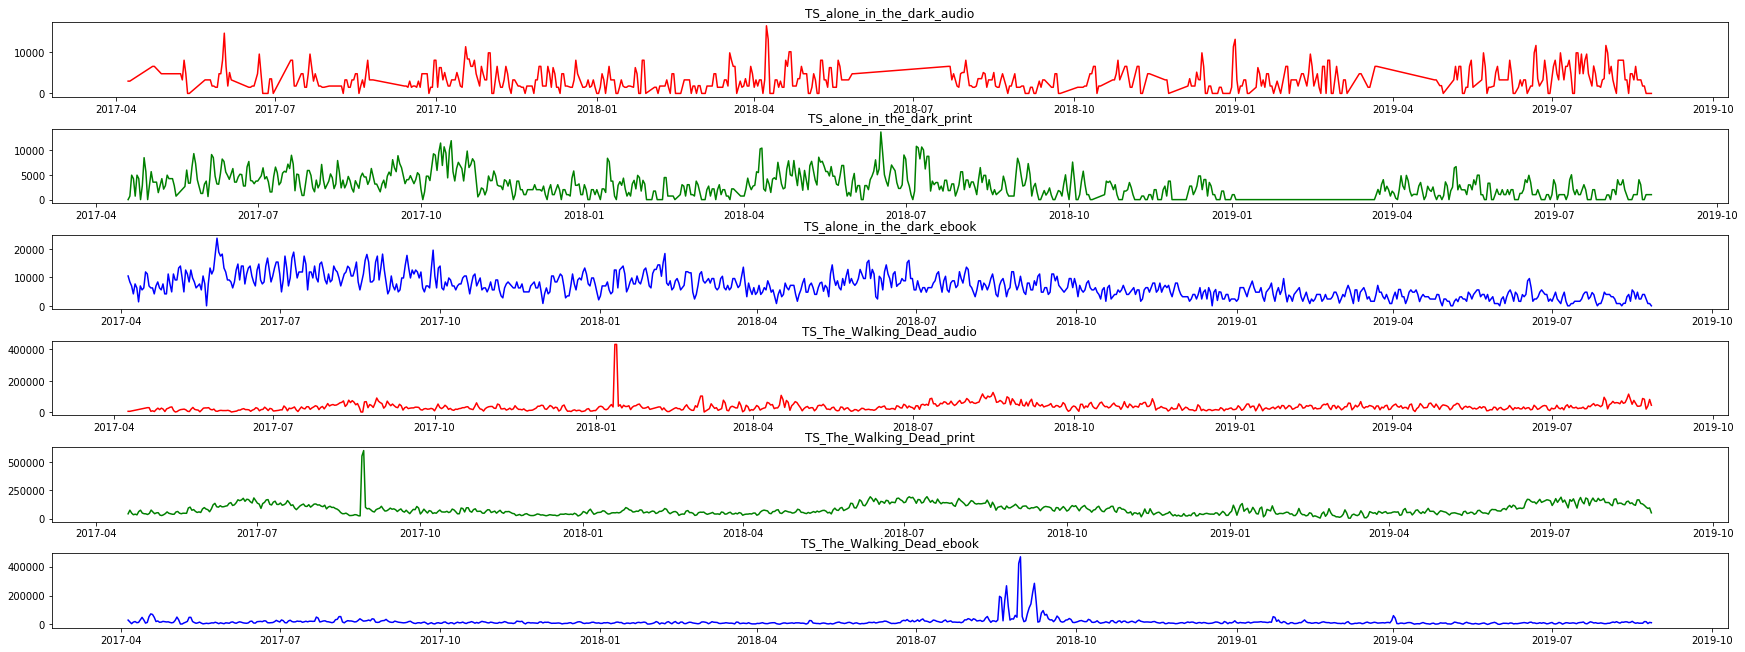

In [57]:
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0] = 24                          
fig_size[1] = 9
k=list(ts_dict.keys())
col=['red', 'green', 'blue','red', 'green', 'blue']
fig,axs = plt.subplots(6,1)
fig.tight_layout() 
plt.subplots_adjust()
list
for i in range(0,6):
    axs[i].plot(ts_dict[k[i]].todate, ts_dict[k[i]]['totalrevenue'], color=col[i])
    axs[i].set_title(k[i])


Above there 6 times serieswhich shows revenue from 2017-4 to 2019-10 of 2 books with different format type. I have observed 
the following from the time series. 
Generally I can observed the trends. For example: The highest revenue was earned between 2017-09 by "The WalkingDead print version".
 Next highest revenue was earned by "The Walking ebook" version in 2018-10 and by "Walking Dead Audio" version 2018-01.


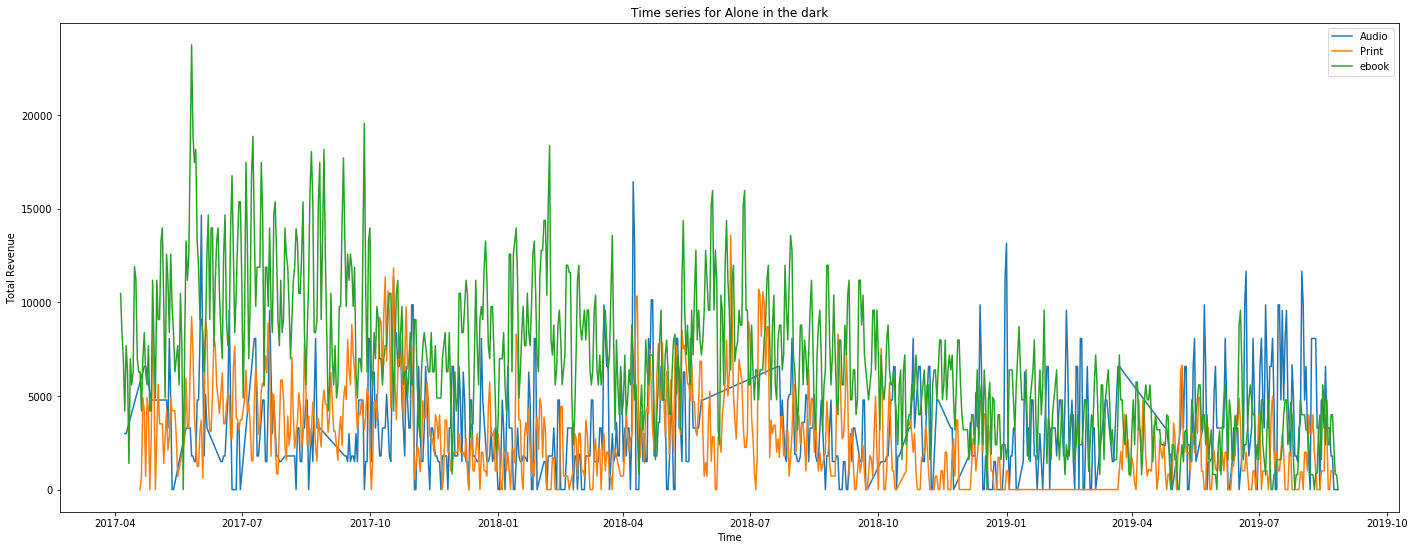

In [314]:
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0] = 24                          
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.plot(TS_alone_in_the_dark_audio['todate'],TS_alone_in_the_dark_audio['totalrevenue'],label='Audio')
plt.plot(TS_alone_in_the_dark_print['todate'],TS_alone_in_the_dark_print['totalrevenue'], label='Print')
plt.plot(TS_alone_in_the_dark_ebook['todate'],TS_alone_in_the_dark_ebook['totalrevenue'], label='ebook')
plt.xlabel('Time')
plt.title('Time series for Alone in the dark')
plt.ylabel('Total Revenue')
plt.legend()

For "Alone in the dark" I can see 
1. Increase in revenue followed by decrease, then increase and later decrease in the ebook revenue.
2. Highest revenue earned is by ebook in between 2017-4 to 2017-07.
3. For the year 2017 ebook earned highest revenue.
4. In year 2019 it seems like Audio book generated higher revenue and then ebook and then print.

In [315]:
#def TS_plot(title,ts):
#    fig_size = plt.rcParams["figure.figsize"] 
#    fig_size[0] = 24                          
#    fig_size[1] = 9
#    plt.rcParams["figure.figsize"] = fig_size
#    plt.plot(ts['todate'],ts['totalrevenue'])
#    plt.xlabel('Time')
#    plt.title(title)
#    plt.ylabel('Total Revenue')


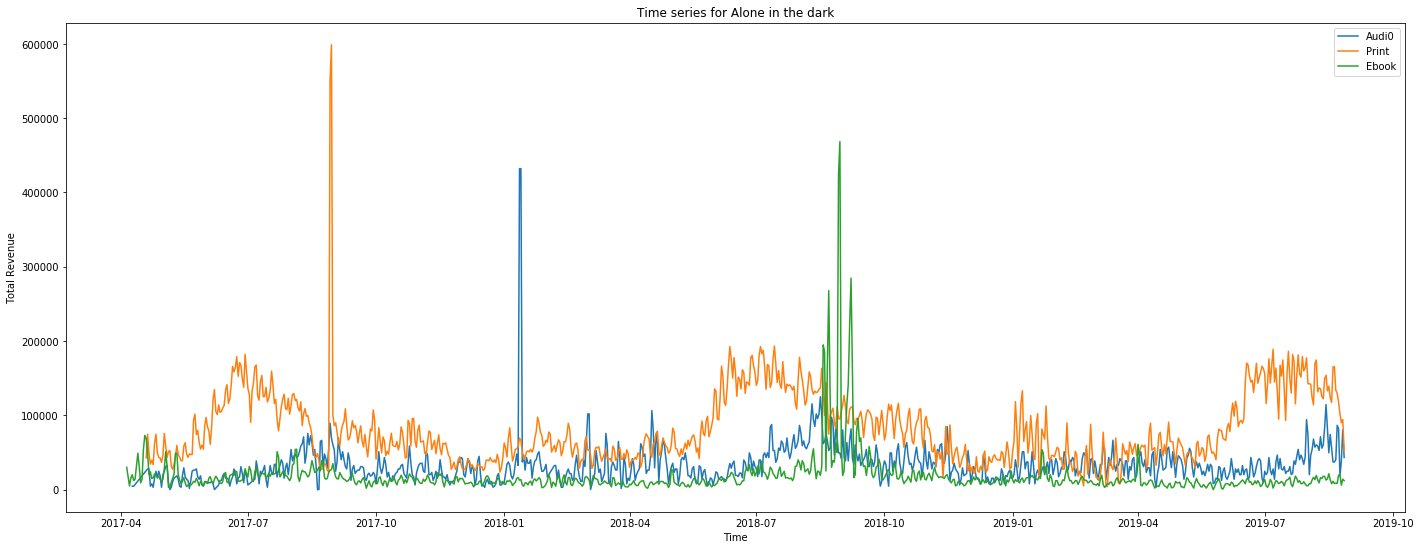

In [316]:
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0] = 24                          
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.plot(TS_The_Walking_Dead_audio['todate'],TS_The_Walking_Dead_audio['totalrevenue'], label='Audi0')
plt.plot(TS_The_Walking_Dead_print['todate'],TS_The_Walking_Dead_print['totalrevenue'], label='Print')
plt.plot(TS_The_Walking_Dead_ebook['todate'],TS_The_Walking_Dead_ebook['totalrevenue'],label='Ebook')
plt.xlabel('Time')
plt.title('Time series for Alone in the dark')
plt.ylabel('Total Revenue')
plt.legend()

For The Walking Dead I have observed:
1. Highest Revenue for Print was generated aound 2017-09.
2. Highest Revenue for Audio was generated in 2018-01.
3. Highes Revenue for Ebook was generated in between 2018-8 to 2018-10.
4. In 2019 the popular version of book is found to be Print.

To analyse the revenue over the period of time I have plotted the time series analysis of each book with respect to its format 
type.

### Models: AR, MA, ARIMA

I will first create a model for time series "Alond in the dark ebook"  TS_alone_in_the_dark_ebook. I will find which time series model Either AR model MA model or ARIMA model is suitable. I will also find the order of model. The same procedure can be applied to other time series.

In [321]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from pandas import read_csv
from matplotlib import pyplot

In [322]:
import warnings
warnings.filterwarnings('ignore')

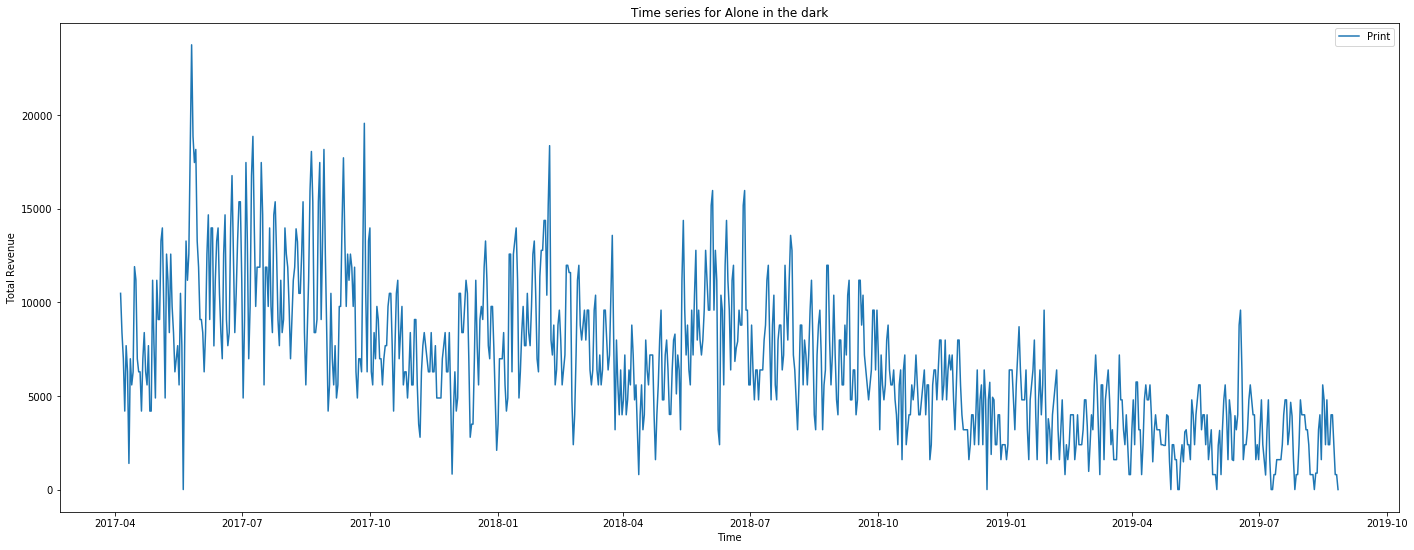

In [323]:
#TS_alone_in_the_dark_print['totalrevenue'].values
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0] = 24                          
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.plot(TS_alone_in_the_dark_ebook['todate'],TS_alone_in_the_dark_ebook['totalrevenue'], label='Print')
plt.xlabel('Time')
plt.title('Time series for Alone in the dark')
plt.ylabel('Total Revenue')
plt.legend()

First I am considering time series alone in the darl for print. I have again plotted it to observed. The first question that
needs to be asked if this time series is stationary or not? If the time series is stationary I will use either AR(p) or MA(q).
If it is not stationary I will use ARIMA model. By observing the data I think it is non stationary. I will use a statistical test Augmented Duckey Fuller test to determine if my observation is correct.

In [325]:
X = TS_alone_in_the_dark_ebook['totalrevenue'].values
from statsmodels.tsa.stattools import adfuller
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.463533
p-value: 0.551468
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


I can accept my hypothesis that time series is not staionary because the test shows that p value 0.55 is higher than the threshold value(0.05) to reject the null hypothesis. Therefore, I consider it non stationary series. As the data is not statioanry I will use ARIMA model. Next I will built ARIMA modle and try to fidn the order.

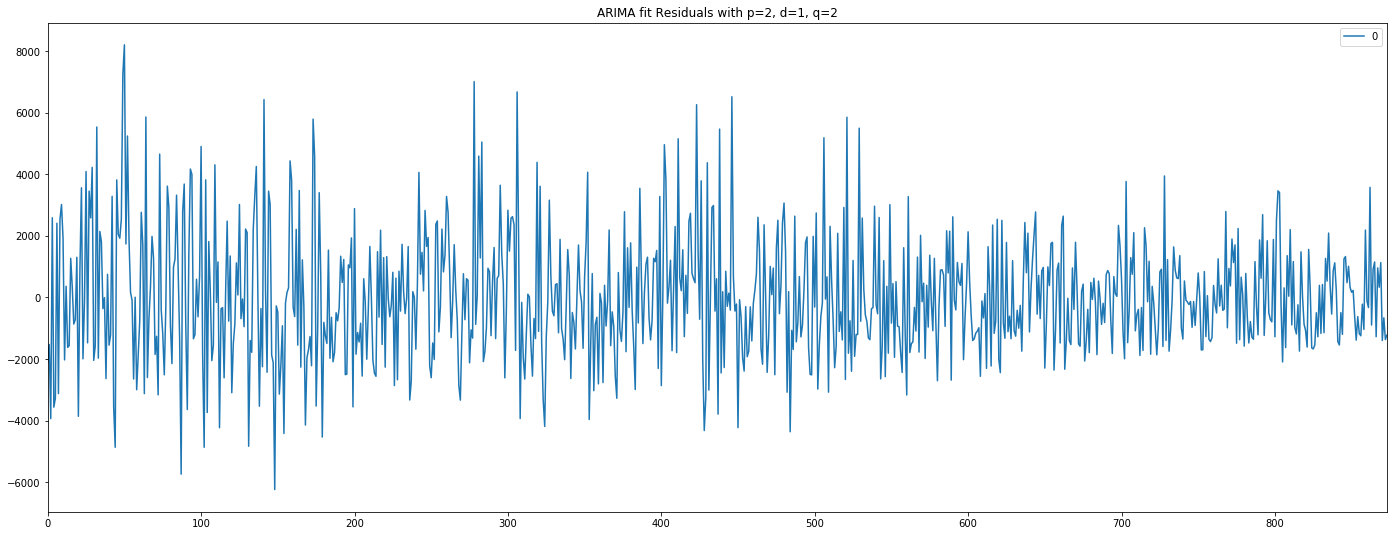

In [326]:
model = ARIMA(X, order=(3,1,2))
model_fit1 = model.fit(disp=0)
residuals = pd.DataFrame(model_fit1.resid)
residuals.plot()
pyplot.title('ARIMA fit Residuals with p=2, d=1, q=2')
pyplot.show()

In this step I am building an ARIMA model with order p, q and d. I can change the order of p, q and d. I have also plotted the
residuals. Now I am going to try a different order of ARIMA model.

In [327]:
#plot_acf(residuals)
#plot_pacf(residuals)
#pyplot.show()

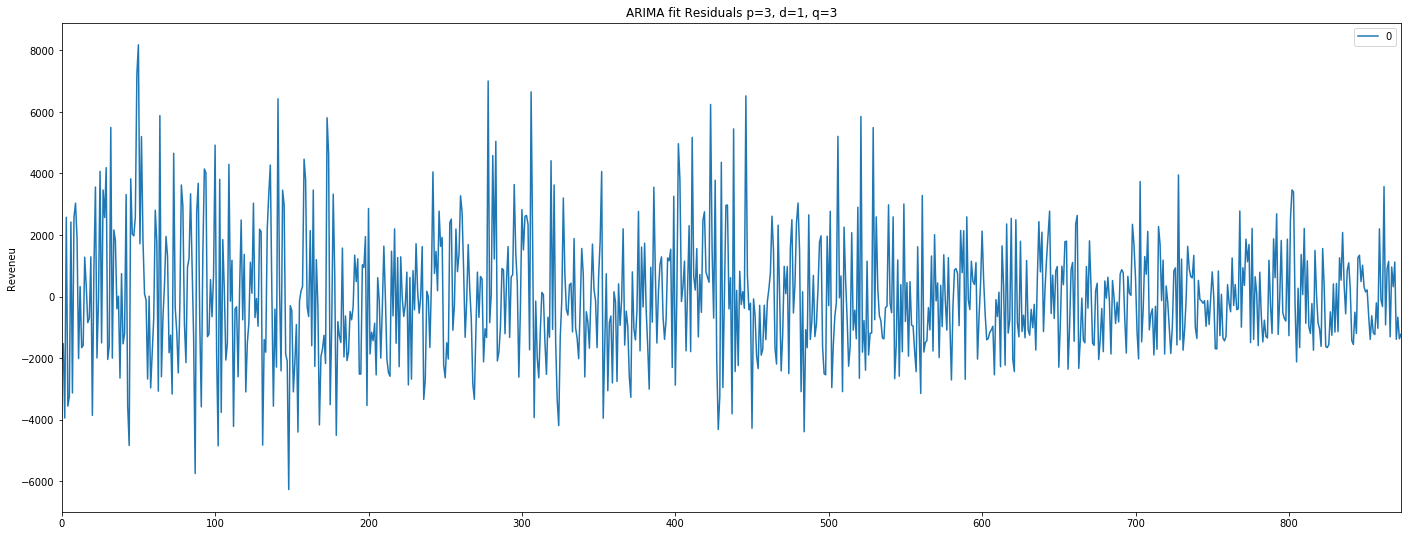

In [328]:
model = ARIMA(X, order=(3,1,3))
model_fit2 = model.fit(disp=0)
residuals = pd.DataFrame(model_fit2.resid)
residuals.plot()
pyplot.title('ARIMA fit Residuals p=3, d=1, q=3')
pyplot.ylabel('Reveneu')
pyplot.show()

Now the question is which order of model is optimum. There are differnt ways to find. I am here using AIC value to find the 
optimum model. 

In [329]:
from statsmodels.tsa.arima_model import ARMAResults 

In [330]:
print(ARMAResults.summary(model_fit1))


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  874
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -7887.398
Method:                       css-mle   S.D. of innovations           2000.725
Date:                Sun, 15 Mar 2020   AIC                          15788.795
Time:                        16:51:08   BIC                          15822.207
Sample:                             1   HQIC                         15801.577
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4604      8.195     -0.788      0.431     -22.522       9.601
ar.L1.D.y     -0.0943      0.037     -2.562      0.011      -0.166      -0.022
ar.L2.D.y      0.0306      0.037      0.821      0.4

In the summary the AIC value is found to be 15788 for p=2,d=1,q=2.

In [331]:
print(ARMAResults.summary(model_fit2))

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  874
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -7887.299
Method:                       css-mle   S.D. of innovations           2000.514
Date:                Sun, 15 Mar 2020   AIC                          15790.598
Time:                        16:51:10   BIC                          15828.783
Sample:                             1   HQIC                         15805.205
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5119      8.092     -0.805      0.421     -22.372       9.348
ar.L1.D.y      0.1598      0.493      0.324      0.746      -0.806       1.125
ar.L2.D.y      0.0560      0.060      0.940      0.3

In the summary the AIC value is found to be 15790 for p=3,d=1,q=3. As AIC for model with p=2,d=1,q=2 is small we will select 
the model p=2, d=1, q=2.